In [1]:
#Importing all the necessary libraries required:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import  stopwords

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train=pd.read_csv('train_mcc.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_test=pd.read_csv('test_mcc.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df_train.iloc[:,2:].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [8]:
for columns in df_train.iloc[:,2:]:
    print(columns)


malignant
highly_malignant
rude
threat
abuse
loathe


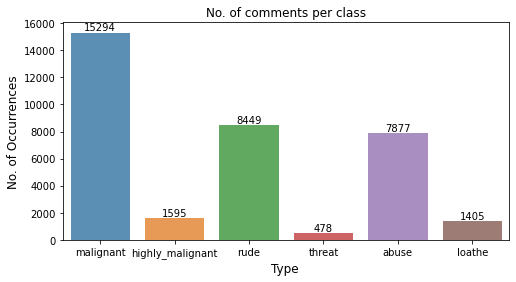

In [9]:
plt.figure(figsize=(8,4))
ax = sns.barplot(df_train.iloc[:,2:].sum().index, df_train.iloc[:,2:].sum().values, alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = df_train.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [12]:
# Create a bar graph 
sum_mal = df_train['malignant'].sum() / len(df_train) * 100
sum_hig = df_train['highly_malignant'].sum() / len(df_train) * 100
sum_rude = df_train['rude'].sum() / len(df_train) * 100
sum_thr = df_train['threat'].sum() / len(df_train) * 100
sum_abu = df_train['abuse'].sum() / len(df_train) * 100
sum_loa = df_train['loathe'].sum() / len(df_train) * 100


In [13]:
# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)


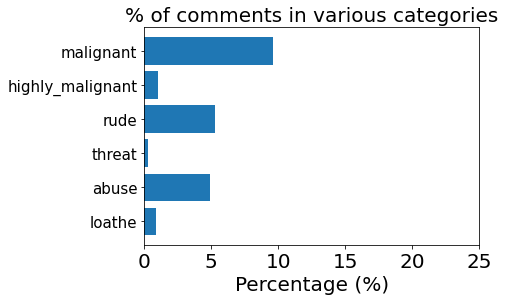

In [14]:
# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_mal, sum_hig, sum_rude, sum_thr, sum_abu, sum_loa])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=20)
plt.yticks(ind, ('malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe' ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()


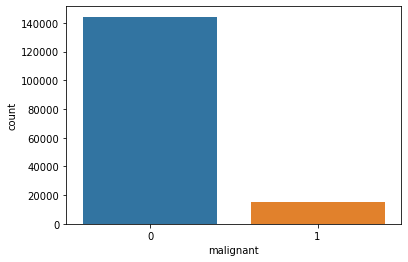

0    144277
1     15294
Name: malignant, dtype: int64


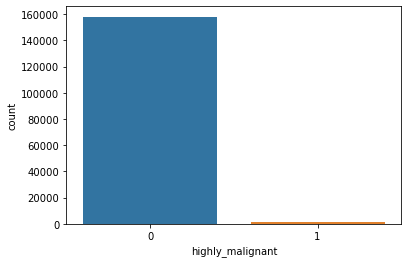

0    157976
1      1595
Name: highly_malignant, dtype: int64


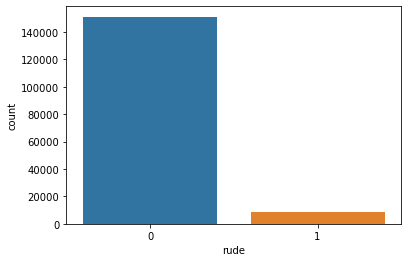

0    151122
1      8449
Name: rude, dtype: int64


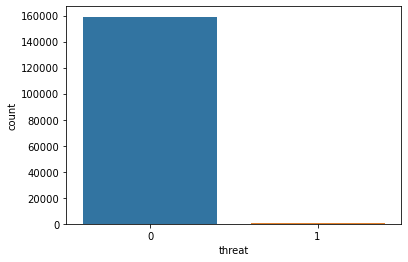

0    159093
1       478
Name: threat, dtype: int64


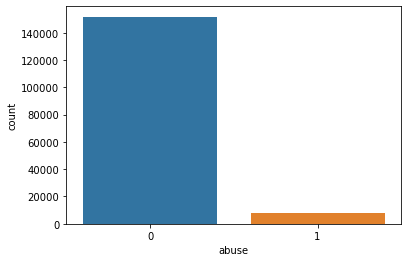

0    151694
1      7877
Name: abuse, dtype: int64


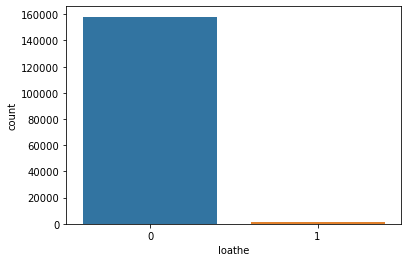

0    158166
1      1405
Name: loathe, dtype: int64


In [16]:
for columns in df_train.iloc[:,2:]:
    sns.countplot(df_train[columns])
    plt.show()
    print(df_train[columns].value_counts())


In [17]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df_train['comment_text'] = df_train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [18]:
# # Separating the labels
df_data_mal = df_train.loc[:,['id','comment_text','malignant']]
df_data_hig = df_train.loc[:,['id','comment_text','highly_malignant']]
df_data_rude = df_train.loc[:,['id','comment_text','rude']]
df_data_thr = df_train.loc[:,['id','comment_text','threat']]
df_data_abu = df_train.loc[:,['id','comment_text','abuse']]
df_data_loa = df_train.loc[:,['id','comment_text','loathe']]


In [19]:
# Wordcloud for visualising most used words
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords


In [20]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(25,25))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(random_state=244), alpha=0.98)


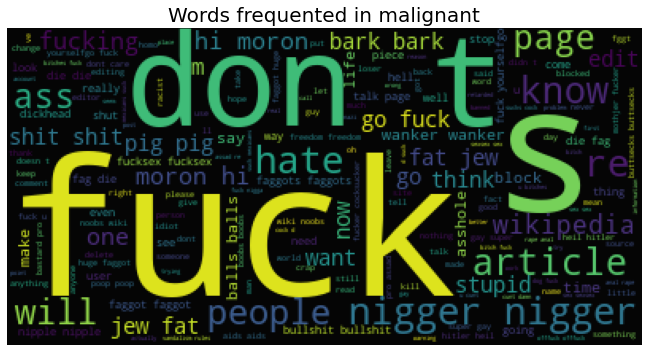

In [22]:
wordcloud(df_data_mal,'malignant')

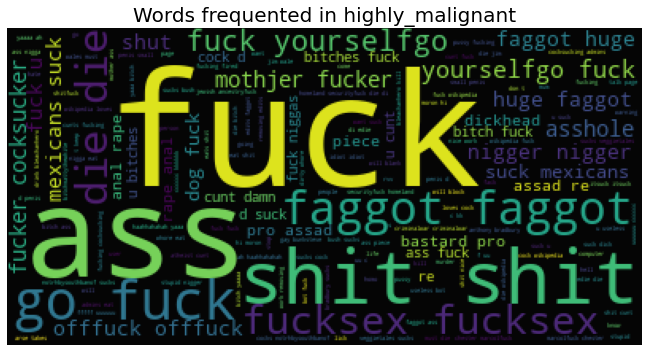

In [23]:
wordcloud(df_data_hig,'highly_malignant')

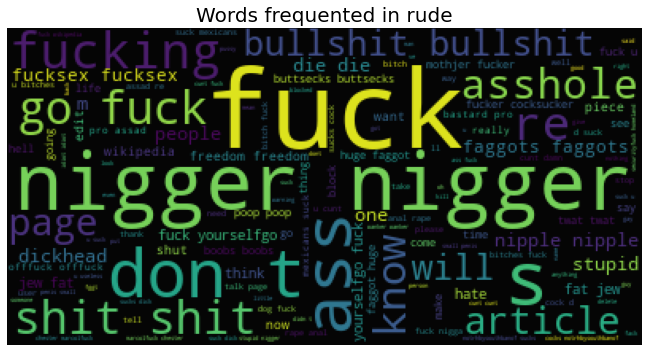

In [24]:
wordcloud(df_data_rude,'rude')

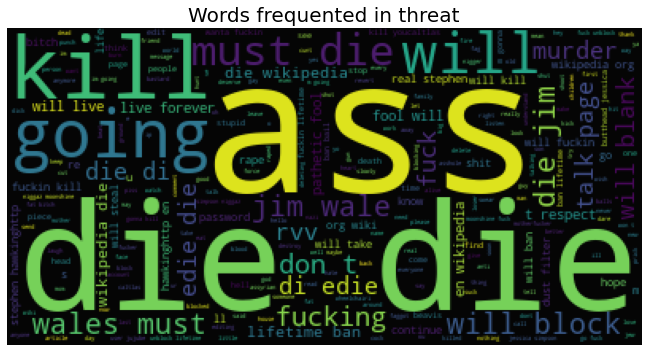

In [25]:
wordcloud(df_data_thr,'threat')

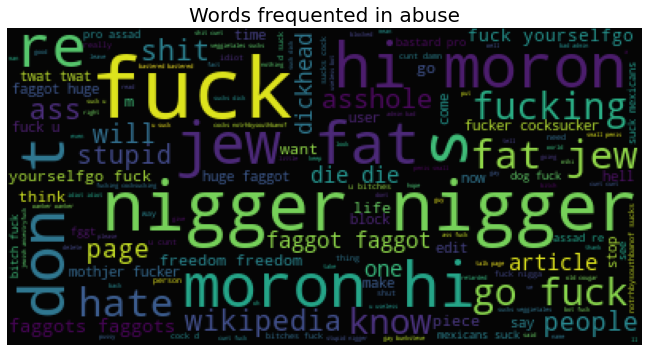

In [26]:
wordcloud(df_data_abu, 'abuse')

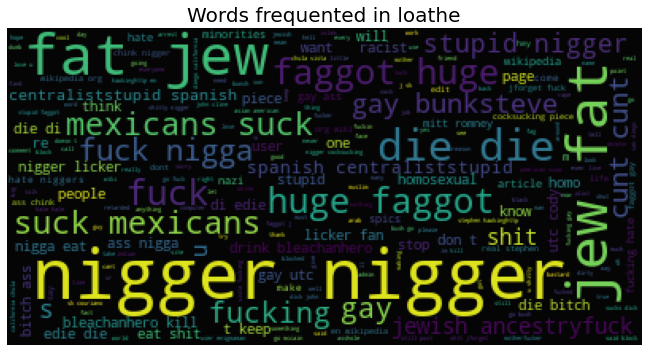

In [27]:
wordcloud(df_data_loa,'loathe')

In [28]:
# # Making the unbalanced data a balanced One
df_data_mal_1 = df_data_mal[df_data_mal['malignant'] == 1].iloc[0:5000,:]
df_data_mal_1.shape

(5000, 3)

In [30]:
df_data_mal_0 = df_data_mal[df_data_mal['malignant'] == 0].iloc[0:5000,:]
df_data_mal_0

,id,comment_text,malignant
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
5544,0ece9249484eddb9,electronic intifada is not an activist site w...,0
5545,0ece971b58a3def7,new genre the new genre supernatural was use...,0
5547,0ecf7cde3391615b,translated as the second vatican council a ...,0
5549,0ed11396420e8531,purpose this rfc will be used to determine com...,0


In [31]:
df_data_mal_done = pd.concat([df_data_mal_1, df_data_mal_0], axis=0)
df_data_mal_done.shape

(10000, 3)

In [32]:
df_data_hig[df_data_hig['highly_malignant'] == 1].count()

id                  1595
comment_text        1595
highly_malignant    1595
dtype: int64

In [33]:
df_data_hig_1 = df_data_hig[df_data_hig['highly_malignant'] == 1].iloc[0:1595,:]
df_data_hig_0 = df_data_hig[df_data_hig['highly_malignant'] == 0].iloc[0:1595,:]
df_data_hig_done = pd.concat([df_data_hig_1, df_data_hig_0], axis=0)
df_data_hig_done.shape

(3190, 3)

In [34]:
df_data_rude[df_data_rude['rude'] == 1].count()

id              8449
comment_text    8449
rude            8449
dtype: int64

In [35]:
df_data_rude_1 = df_data_rude[df_data_rude['rude'] == 1].iloc[0:5000,:]
df_data_rude_0 = df_data_rude[df_data_rude['rude'] == 0].iloc[0:5000,:]
df_data_rude_done = pd.concat([df_data_rude_1, df_data_rude_0], axis=0)
df_data_rude_done.shape

(10000, 3)

In [36]:
df_data_thr[df_data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [37]:
df_data_thr[df_data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [39]:
df_data_thr_1 = df_data_thr[df_data_thr['threat'] == 1].iloc[0:478,:]

In [40]:
# We include 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
df_data_thr_0 = df_data_thr[df_data_thr['threat'] == 0].iloc[0:1912,:]  
df_data_thr_done = pd.concat([df_data_thr_1, df_data_thr_0], axis=0)
df_data_thr_done.shape

(2390, 3)

In [41]:
df_data_abu[df_data_abu['abuse'] == 1].count()

id              7877
comment_text    7877
abuse           7877
dtype: int64

In [42]:
df_data_abu_1 = df_data_abu[df_data_abu['abuse'] == 1].iloc[0:5000,:]
df_data_abu_0 = df_data_abu[df_data_abu['abuse'] == 0].iloc[0:5000,:]
df_data_abu_done = pd.concat([df_data_abu_1, df_data_abu_0], axis=0)
df_data_abu_done.shape

(10000, 3)

In [43]:
df_data_loa_1 = df_data_loa[df_data_loa['loathe'] == 1].iloc[0:1405,:] # 20%
df_data_loa_0 = df_data_loa[df_data_loa['loathe'] == 0].iloc[0:5620,:] # 80%
df_data_loa_done = pd.concat([df_data_loa_1, df_data_loa_0], axis=0)
df_data_loa_done.shape

(7025, 3)

In [44]:
# # Model Building
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [45]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1


In [47]:
df_mal_cv = cv_tf_train_test(df_data_mal_done, 'malignant', TfidfVectorizer, (1,1))
df_mal_cv.rename(columns={'F1 Score': 'F1 Score(malignant)'}, inplace=True)

df_mal_cv


lr done
bnb done
mnb done
rdf done


,F1 Score(malignant)
Log Regression,0.860941
KNN,0.170616
BernoulliNB,0.776521
MultinomialNB,0.874958
SVM,0.876510
Random Forest,0.835621


In [48]:
df_hig_cv = cv_tf_train_test(df_data_hig_done, 'highly_malignant', TfidfVectorizer, (1,1))
df_hig_cv.rename(columns={'F1 Score': 'F1 Score(highly_malignant)'}, inplace=True)

df_hig_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(highly_malignant)
Log Regression,0.927879
KNN,0.837809
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.927660


In [49]:
df_rude_cv = cv_tf_train_test(df_data_rude_done, 'rude', TfidfVectorizer, (1,1))
df_rude_cv.rename(columns={'F1 Score': 'F1 Score(rude)'}, inplace=True)

df_rude_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(rude)
Log Regression,0.908655
KNN,0.410982
BernoulliNB,0.787830
MultinomialNB,0.901399
SVM,0.921378
Random Forest,0.907370


In [50]:
df_thr_cv = cv_tf_train_test(df_data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

df_thr_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(threat)
Log Regression,0.628821
KNN,0.586207
BernoulliNB,0.311828
MultinomialNB,0.504762
SVM,0.786765
Random Forest,0.800000


In [51]:
df_abu_cv = cv_tf_train_test(df_data_abu_done, 'abuse', TfidfVectorizer, (1,1))
df_abu_cv.rename(columns={'F1 Score': 'F1 Score(abuse)'}, inplace=True)

df_abu_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(abuse)
Log Regression,0.896599
KNN,0.244898
BernoulliNB,0.783762
MultinomialNB,0.897411
SVM,0.902619
Random Forest,0.882616


In [52]:
df_loa_cv = cv_tf_train_test(df_data_loa_done, 'loathe', TfidfVectorizer, (1,1))
df_loa_cv.rename(columns={'F1 Score': 'F1 Score(loathe)'}, inplace=True)

df_loa_cv

lr done
bnb done
mnb done
rdf done


,F1 Score(loathe)
Log Regression,0.699029
KNN,0.197980
BernoulliNB,0.549206
MultinomialNB,0.485857
SVM,0.797516
Random Forest,0.769821


In [54]:
# Let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
final_all = pd.concat([df_mal_cv, df_hig_cv, df_rude_cv, df_abu_cv, df_thr_cv, df_loa_cv], axis=1)
final_all

,F1 Score(malignant),F1 Score(highly_malignant),F1 Score(rude),F1 Score(abuse),F1 Score(threat),F1 Score(loathe)
Log Regression,0.860941,0.927879,0.908655,0.896599,0.628821,0.699029
KNN,0.170616,0.837809,0.410982,0.244898,0.586207,0.197980
BernoulliNB,0.776521,0.803707,0.787830,0.783762,0.311828,0.549206
MultinomialNB,0.874958,0.936170,0.901399,0.897411,0.504762,0.485857
SVM,0.876510,0.926004,0.921378,0.902619,0.786765,0.797516
Random Forest,0.835621,0.927660,0.907370,0.882616,0.800000,0.769821


In [55]:
final_all_trp = final_all.transpose()
final_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(malignant),0.860941,0.170616,0.776521,0.874958,0.876510,0.835621
F1 Score(highly_malignant),0.927879,0.837809,0.803707,0.936170,0.926004,0.927660
F1 Score(rude),0.908655,0.410982,0.787830,0.901399,0.921378,0.907370
F1 Score(abuse),0.896599,0.244898,0.783762,0.897411,0.902619,0.882616
F1 Score(threat),0.628821,0.586207,0.311828,0.504762,0.786765,0.800000
F1 Score(loathe),0.699029,0.197980,0.549206,0.485857,0.797516,0.769821


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

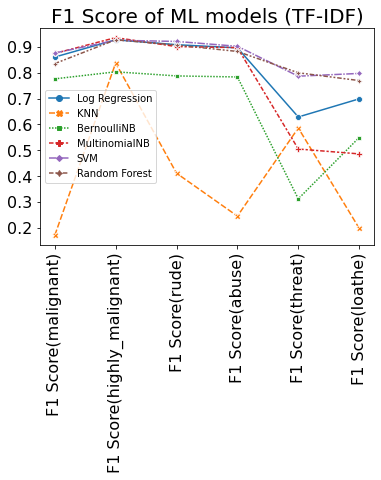

In [56]:
sns.lineplot(data=final_all_trp, markers=True)
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

In [58]:
# Repeat this for CountVectorizer as well


# LinearSVM and Random Forest models perform best (purple and brown lines seem to be the highest).
# 
# Test if our code actually works. Probability of the comment falling in various categories should be output.
df_data_mal_done.head()

,id,comment_text,malignant
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1


In [60]:
X = df_data_mal_done.comment_text
y = df_data_mal_done['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [65]:
# Sample Prediction
test_vect = tfv.transform(df_test['comment_text'])
randomforest.predict_proba(test_vect)[:,1]

array([0.92      , 0.12258283, 0.15674026, ..., 0.12492857, 0.1803355 ,
       0.7       ])

Here we can see that LinearSVM and Random Forest models perform best and is giving the best accuracy score.
Hence the LinearSVM and Random Forest is the perfect model and we have finalized it.
